# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Load the u.data

In [2]:
# Set the column name
col_name = ["user_id","item_id","rating","timestamp"]

# Load the data
path = "/Users/vongola/Desktop/textminingHW2/ml-100k"

data_all = pd.read_csv(path + "/u.data",sep="\t", names = col_name)

# Histogram - Number of ratings for a movie

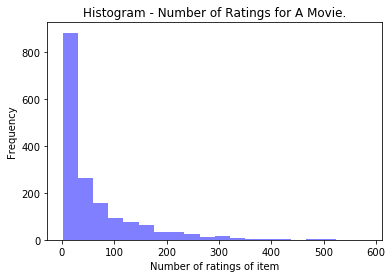

In [3]:
# Set the data
num_item = data_all["item_id"].max()
num_ratings_item = []

for i in range(1,num_item+1):
    temp_num = (data_all[data_all["item_id"] == i].size)/4
    num_ratings_item.append(temp_num)

num_bins = 20

# Set the histogram
n, bins, patches = plt.hist(num_ratings_item, num_bins, facecolor = "blue", alpha = 0.5)

plt.xlabel('Number of ratings of item')
plt.ylabel('Frequency')
plt.title("Histogram - Number of Ratings for A Movie.")

plt.show()

# Histogram - Number of ratings for a user

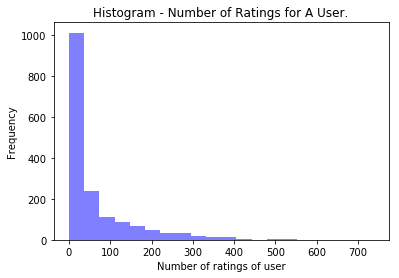

In [4]:
# Set the data
num_user = data_all["user_id"].max()
num_ratings_user = []

for i in range(1,num_item+1):
    temp_num = (data_all[data_all["user_id"] == i].size)/4
    num_ratings_user.append(temp_num)

num_bins = 20

# Set the histogram
n, bins, patches = plt.hist(num_ratings_user, num_bins, facecolor = "blue", alpha = 0.5)

plt.xlabel('Number of ratings of user')
plt.ylabel('Frequency')
plt.title("Histogram - Number of Ratings for A User.")

plt.show()

# Recommender System - Baseline Predictor

In [5]:
# Load data
data_ua_train = pd.read_csv(path + "/ua.base",sep="\t", names = col_name)
data_ua_test = pd.read_csv(path + "/ua.test",sep="\t", names = col_name)

# Get the parameters
num_user_ua_train = data_ua_train["user_id"].max()
num_item_ua_train = data_ua_train["item_id"].max()
num_user_ua_test = data_ua_test["user_id"].max()
num_item_ua_test = data_ua_test["item_id"].max()

# Create the zero matrix
matrix_ua_train = np.zeros(shape = (num_user_ua_train,num_item_ua_train))
matrix_ua_test = np.zeros(shape = (num_user_ua_test,num_item_ua_test))

## Create the matrix

### Define the function to fill the matrix

In [6]:
def fill_matrix(matrix, num_user, data):
    index = 0
    size = 0
    
    for i in range(1,num_user+1):
        temp = data[data["user_id"] == i]
        while index < (size + temp.size/4):
            item = temp.loc[index]["item_id"]
            rating = temp.loc[index]["rating"]
            matrix[i-1][item-1] = rating
            index += 1
        size += temp.size/4        

### Define the function to calculate bi

In [7]:
def cal_bi(miu):
    
    exist_value = matrix_ua_train > 0
    matrix_temp = matrix_ua_train.copy()
    
    matrix_temp[exist_value] = matrix_temp[exist_value] - miu
    
    num = exist_value.sum(axis=0) + 25
    
    bi = matrix_temp.sum(axis=0)/num
    
    return bi

### Define the function to calculate bu

In [8]:
def cal_bu(miu):
    
    exist_value = matrix_ua_train > 0
    matrix_temp = matrix_ua_train.copy()
    matrix_temp[exist_value] = matrix_temp[exist_value] - miu
    matrix_temp = matrix_temp - bi
    matrix_temp[~exist_value] = 0
    
    num = exist_value.sum(axis = 1)
    num = num + 10
    
    bu = matrix_temp.sum(axis = 1)/num
    
    return bu

In [9]:
# Fill in the matrix
fill_matrix(matrix_ua_train,num_user_ua_train,data_ua_train)  
fill_matrix(matrix_ua_test,num_user_ua_test,data_ua_test)

In [10]:
# Calculate the bi and bu
real_value = matrix_ua_train > 0
miu = matrix_ua_train.sum()/(real_value.sum())
bi = cal_bi(miu)
bu = cal_bu(miu)

### Define the function to get the required list

In [11]:
def get_list(data):
    list_user = np.array(data["user_id"])
    list_item = np.array(data["item_id"])
    list_rating = np.array(data["rating"])
    
    return list_user,list_item,list_rating

### Define the function to calculate the RMSE for Baseline Predictor

In [12]:
def cal_RMSE(list_user, list_item, list_rating):
        
    num_rating = list_user.size
    RMSE_sum = 0
    
    for i in range(num_rating):
        temp_item = list_item[i]
        temp_user = list_user[i]
        temp_bi = bi[temp_item-1]
        temp_bu = bu[temp_user-1]

        temp_error = math.pow((miu + temp_bi + temp_bu - list_rating[i]),2)
        RMSE_sum += temp_error
        
    RMSE_value = math.pow(RMSE_sum/num_rating,0.5) 
    
    return RMSE_value

### Calculate the RMSE for test set

In [13]:
test_list_user, test_list_item, test_list_rating = get_list(data_ua_test)
RMSE_test = cal_RMSE(test_list_user, test_list_item, test_list_rating)

print RMSE_test

0.966481783888


# Result - 1.2.a

RMSE - 0.966481783888

### Calculate the RMSE for different test rating

In [14]:
# For rating 1
rating1 = data_ua_test[data_ua_test["rating"] == 1]
rating1_list_user, rating1_list_item, rating1_list_rating = get_list(rating1)
RMSE_rating1 = cal_RMSE(rating1_list_user, rating1_list_item, rating1_list_rating)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1

# For rating 2
rating2 = data_ua_test[data_ua_test["rating"] == 2]
rating2_list_user, rating2_list_item, rating2_list_rating = get_list(rating2)
RMSE_rating2 = cal_RMSE(rating2_list_user, rating2_list_item, rating2_list_rating)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2

# For rating 3
rating3 = data_ua_test[data_ua_test["rating"] == 3]
rating3_list_user, rating3_list_item, rating3_list_rating = get_list(rating3)
RMSE_rating3 = cal_RMSE(rating3_list_user, rating3_list_item, rating3_list_rating)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3

# For rating 4
rating4 = data_ua_test[data_ua_test["rating"] == 4]
rating4_list_user, rating4_list_item, rating4_list_rating = get_list(rating4)
RMSE_rating4 = cal_RMSE(rating4_list_user, rating4_list_item, rating4_list_rating)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4

# For rating 5
rating5 = data_ua_test[data_ua_test["rating"] == 5]
rating5_list_user, rating5_list_item, rating5_list_rating = get_list(rating5)
RMSE_rating5 = cal_RMSE(rating5_list_user, rating5_list_item, rating5_list_rating)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5

-----------------------------Result for RMSE_rating1------------------------------------
2.1125443819
-----------------------------Result for RMSE_rating2------------------------------------
1.30648829362
-----------------------------Result for RMSE_rating3------------------------------------
0.605826897197
-----------------------------Result for RMSE_rating4------------------------------------
0.531504541752
-----------------------------Result for RMSE_rating5------------------------------------
1.15351408


# Result - 1.2.b

### Bar Chart - RMSE for all test ratings

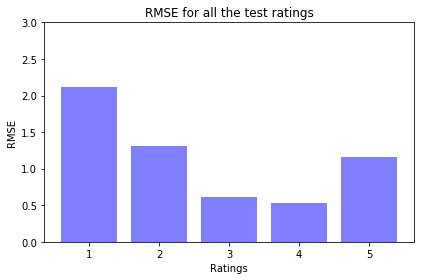

In [15]:
# Set the data
RMSE_test_ratings = [RMSE_rating1, RMSE_rating2, RMSE_rating3, RMSE_rating4, RMSE_rating5]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for all the test ratings') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,3) 

plt.tight_layout()
plt.show()

### Find the range of average ratings for each user

In [16]:
num_user_ua_train = data_ua_train["user_id"].max()
avg_user_rating = []

for i in range(1,num_user_ua_train + 1):
    temp = data_ua_train[data_ua_train["user_id"] == i]
    avg_rating = temp["rating"].sum()/float(temp.size/4)
    avg_user_rating.append(avg_rating)

print max(avg_user_rating)
print min(avg_user_rating)

4.92857142857
1.48941176471


### Get the list of user based on average ratings

In [17]:
max_user_avg = max(avg_user_rating)
min_user_avg = min(avg_user_rating)
step = (max_user_avg - min_user_avg)/5

user_list_step1 = []
user_list_step2 = []
user_list_step3 = []
user_list_step4 = []
user_list_step5 = []

for i in range(len(avg_user_rating)):
    if avg_user_rating[i] <= (min_user_avg + step):
        user_list_step1.append(i+1)
    elif (min_user_avg + step) < avg_user_rating[i] <= (min_user_avg + step * 2):
        user_list_step2.append(i+1)
    elif (min_user_avg + step * 2) < avg_user_rating[i] <= (min_user_avg + step * 3):
        user_list_step3.append(i+1)
    elif (min_user_avg + step * 3) < avg_user_rating[i] <= (min_user_avg + step * 4):
        user_list_step4.append(i+1)
    else:
        user_list_step5.append(i+1)    

### Calculate the RMSE for different users

In [18]:
# For user type 1
rating1 = data_ua_test[data_ua_test["user_id"].isin(user_list_step1)]
rating1_list_user, rating1_list_item, rating1_list_rating = get_list(rating1)
RMSE_rating1 = cal_RMSE(rating1_list_user, rating1_list_item, rating1_list_rating)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1

# For rating 2
rating2 = data_ua_test[data_ua_test["user_id"].isin(user_list_step2)]
rating2_list_user, rating2_list_item, rating2_list_rating = get_list(rating2)
RMSE_rating2 = cal_RMSE(rating2_list_user, rating2_list_item, rating2_list_rating)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2

# For rating 3
rating3 = data_ua_test[data_ua_test["user_id"].isin(user_list_step3)]
rating3_list_user, rating3_list_item, rating3_list_rating = get_list(rating3)
RMSE_rating3 = cal_RMSE(rating3_list_user, rating3_list_item, rating3_list_rating)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3

# For rating 4
rating4 = data_ua_test[data_ua_test["user_id"].isin(user_list_step4)]
rating4_list_user, rating4_list_item, rating4_list_rating = get_list(rating4)
RMSE_rating4 = cal_RMSE(rating4_list_user, rating4_list_item, rating4_list_rating)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4

# For rating 5
rating5 = data_ua_test[data_ua_test["user_id"].isin(user_list_step5)]
rating5_list_user, rating5_list_item, rating5_list_rating = get_list(rating5)
RMSE_rating5 = cal_RMSE(rating5_list_user, rating5_list_item, rating5_list_rating)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5

-----------------------------Result for RMSE_rating1------------------------------------
1.10886596579
-----------------------------Result for RMSE_rating2------------------------------------
1.15083430531
-----------------------------Result for RMSE_rating3------------------------------------
1.00076338174
-----------------------------Result for RMSE_rating4------------------------------------
0.926408980006
-----------------------------Result for RMSE_rating5------------------------------------
0.887866917339


# Result - 1.2.c

### Bar Chart - RMSE for all types of users

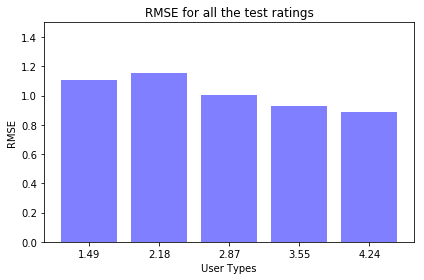

In [19]:
# Set the data
RMSE_test_ratings = [RMSE_rating1, RMSE_rating2, RMSE_rating3, RMSE_rating4, RMSE_rating5]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('User Types') 
plt.ylabel('RMSE')
plt.title('RMSE for all the test ratings') 
plt.xticks(index, (str(round((min_user_avg),2)), str(round((min_user_avg + step),2)), 
                   str(round((min_user_avg + 2*step),2)), str(round((min_user_avg + 3*step),2)), 
                   str(round((min_user_avg + 4*step),2)))) 
plt.ylim(0,1.5) 

plt.tight_layout()
plt.show()

# Recommender System - KNN

### Define the funtion to calcualte the similarity between two items

In [20]:
def similarity(item_1,item_2,data):
    temp_1 = data[data["item_id"] == item_1]
    temp_2 = data[data["item_id"] == item_2]
    
    user_temp_1 = np.array(temp_1["user_id"]).tolist()
    user_temp_2 = np.array(temp_2["user_id"]).tolist()
    
    user_union = [val for val in user_temp_1 if val in user_temp_2]
    
    if len(user_union) == 0:
        return 0.00001 #Assume 99 is a infinite number for similarity problem
    else:  
        sum_numerator = 0
        sum_denominator_left = 0
        sum_denominator_right = 0
     
        for user in user_union:
            avg_rating = avg_user_rating[user-1]
        
            rating_1 = matrix_ua_train[user-1][item_1-1]
            rating_2 = matrix_ua_train[user-1][item_2-1]
        
            temp_numerator = (rating_1 - avg_rating) * (rating_2 - avg_rating)
            temp_denominator_left = math.pow((rating_1 - avg_rating),2)
            temp_denominator_right = math.pow((rating_2 - avg_rating),2)
          
            sum_numerator += temp_numerator
            sum_denominator_left += temp_denominator_left
            sum_denominator_right += temp_denominator_right
        
        similarity_result = sum_numerator/((math.pow(sum_denominator_left*sum_denominator_right,0.5)) + 0.00001)
    
        return similarity_result

### Create the similarity matrix

In [21]:
matrix_similarity = np.zeros(shape = (1682,1682))

# Fill the matrix

for i in range(1682):
    
    #Record the process
    if i%1000 == 0:
        print i
        
    for j in  range(i,1682):
        if i == j:
            matrix_similarity[i][j] = 0
        else:
            matrix_similarity[i][j] = similarity(i+1,j+1,data_ua_train)

0
1000


In [22]:
matrix_sim = matrix_similarity + matrix_similarity.T

### Record the TOP similarity items in test

In [23]:
test_list_user, test_list_item, test_list_rating = get_list(data_ua_test)

dic_test_top10 = {}

for i in range(len(test_list_user)):
    
    temp_item = test_list_item[i]
    temp_user = test_list_user[i]
    temp_similarity = []
    temp_top = []
    
    temp_user_item = data_ua_train[data_ua_train["user_id"] == temp_user]["item_id"].tolist()
    
    for item in temp_user_item:
        temp_similarity.append(abs(matrix_sim[item-1][temp_item-1]))
    
    temp_item_similarity = pd.Series(temp_similarity)
    top_10 = temp_item_similarity.sort_values(ascending=False).head(10)
    temp_list = top_10.index.tolist()
    
    
    for j in range(10):
        temp_top.append(temp_user_item[temp_list[j]])
        
    dic_test_top10[str(temp_user) + "+" + str(temp_item)] = temp_top

### Define the function to calculate RMSE for KNN

In [24]:
def cal_RMSE_KNN(user_test, item_test, rating_test, k):
    
    RMSE_sum = 0
    num_rating = rating_test.size
    
    for i in range(num_rating):
        
        temp_item = item_test[i]
        temp_user = user_test[i]
        temp_top10 = dic_test_top10[str(temp_user) + "+" + str(temp_item)] 
    
        sum_similarity = 0
        sum_sim_rating = 0
        similarity_value = []
        similarity_item_rating = []
                
        # Calculate the predict rating 
        for j in range(k):
            
            similarity_item_rating.append(matrix_ua_train[temp_user-1][temp_top10[j]-1]) # Get the rating for sim item
            similarity_value.append(abs(matrix_sim[temp_item-1][temp_top10[j]-1])) # Get the sim value
            sum_sim_rating += similarity_value[j] * similarity_item_rating[j]
            sum_similarity += similarity_value[j]
            
        rating_pre = sum_sim_rating/sum_similarity  
         
        temp_error = math.pow((rating_pre - rating_test[i]),2)
        RMSE_sum += temp_error
        
    RMSE_value = math.pow(RMSE_sum/num_rating,0.5) 
    
    return RMSE_value

# Result - 1.3.a

### Compute the RMSE for Different K values

In [25]:
RMSE_K_1 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 1)
print "-----------------------------Result for RMSE_K_1------------------------------------"
print RMSE_K_1

RMSE_K_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)
print "-----------------------------Result for RMSE_K_2------------------------------------"
print RMSE_K_2

RMSE_K_3 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 3)
print "-----------------------------Result for RMSE_K_3------------------------------------"
print RMSE_K_3

RMSE_K_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)
print "-----------------------------Result for RMSE_K_5------------------------------------"
print RMSE_K_5

RMSE_K_10 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 10)
print "-----------------------------Result for RMSE_K_10------------------------------------"
print RMSE_K_10

-----------------------------Result for RMSE_K_1------------------------------------
1.5537386922
-----------------------------Result for RMSE_K_2------------------------------------
1.34973503629
-----------------------------Result for RMSE_K_3------------------------------------
1.26854767836
-----------------------------Result for RMSE_K_5------------------------------------
1.20097337913
-----------------------------Result for RMSE_K_10------------------------------------
1.1334453534


Conclusion : Hence, k = 10 is the optimal one

### Calculate the RMSE for different test rating using KNN (K = 2)

In [26]:
# For rating 1
rating1 = data_ua_test[data_ua_test["rating"] == 1]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_2

# For rating 2
rating2 = data_ua_test[data_ua_test["rating"] == 2]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_2

# For rating 3
rating3 = data_ua_test[data_ua_test["rating"] == 3]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_2

# For rating 4
rating4 = data_ua_test[data_ua_test["rating"] == 4]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_2

# For rating 5
rating5 = data_ua_test[data_ua_test["rating"] == 5]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_2

-----------------------------Result for RMSE_rating1------------------------------------
2.18977212937
-----------------------------Result for RMSE_rating2------------------------------------
1.45470230833
-----------------------------Result for RMSE_rating3------------------------------------
0.921068383779
-----------------------------Result for RMSE_rating4------------------------------------
1.10070196635
-----------------------------Result for RMSE_rating5------------------------------------
1.72425418067


# Result - 1.3.b

### Bar Chart - RMSE for different ratings using KNN (K=2)

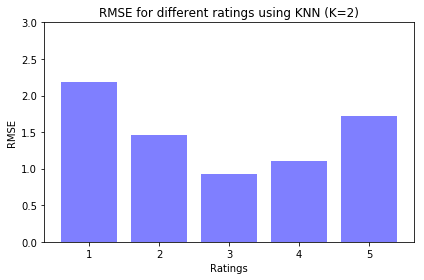

In [27]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_2, RMSE_rating2_k_2, RMSE_rating3_k_2, RMSE_rating4_k_2, RMSE_rating5_k_2]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different ratings using KNN (K=2)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,3) 

plt.tight_layout()
plt.show()

### Calculate the RMSE for different test rating using KNN (K = 5)

In [28]:
# For rating 1
rating1 = data_ua_test[data_ua_test["rating"] == 1]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_5

# For rating 2
rating2 = data_ua_test[data_ua_test["rating"] == 2]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_5

# For rating 3
rating3 = data_ua_test[data_ua_test["rating"] == 3]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_5

# For rating 4
rating4 = data_ua_test[data_ua_test["rating"] == 4]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_5

# For rating 5
rating5 = data_ua_test[data_ua_test["rating"] == 5]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_5

-----------------------------Result for RMSE_rating1------------------------------------
2.14730886484
-----------------------------Result for RMSE_rating2------------------------------------
1.3784441852
-----------------------------Result for RMSE_rating3------------------------------------
0.735160749346
-----------------------------Result for RMSE_rating4------------------------------------
0.889874183255
-----------------------------Result for RMSE_rating5------------------------------------
1.5653535719


# Result - 1.3.b

### Bar Chart - RMSE for different ratings using KNN (K=5)

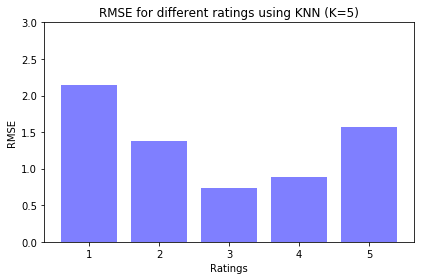

In [29]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_5, RMSE_rating2_k_5, RMSE_rating3_k_5, RMSE_rating4_k_5, RMSE_rating5_k_5]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different ratings using KNN (K=5)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,3) 

plt.tight_layout()
plt.show()

# Result - 1.3.c

### Calculate the RMSE for different types of users using KNN (K = 1)

In [30]:
### For rating 1
rating1 = data_ua_test[data_ua_test["user_id"].isin(user_list_step1)]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_1 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 1)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_1

# For rating 2
rating2 = data_ua_test[data_ua_test["user_id"].isin(user_list_step2)]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_1 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 1)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_1

# For rating 3
rating3 = data_ua_test[data_ua_test["user_id"].isin(user_list_step3)]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_1 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 1)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_1

# For rating 4
rating4 = data_ua_test[data_ua_test["user_id"].isin(user_list_step4)]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_1 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 1)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_1

# For rating 5
rating5 = data_ua_test[data_ua_test["user_id"].isin(user_list_step5)]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_1 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 1)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_1

-----------------------------Result for RMSE_rating1------------------------------------
1.38443731049
-----------------------------Result for RMSE_rating2------------------------------------
1.87794213613
-----------------------------Result for RMSE_rating3------------------------------------
1.63968163322
-----------------------------Result for RMSE_rating4------------------------------------
1.48701274257
-----------------------------Result for RMSE_rating5------------------------------------
1.23871959277


### Bar Chart - RMSE for different types of users using KNN (K=1)

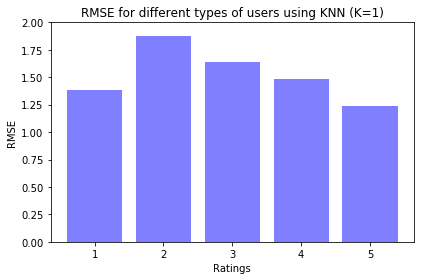

In [31]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_1, RMSE_rating2_k_1, RMSE_rating3_k_1, RMSE_rating4_k_1, RMSE_rating5_k_1]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=1)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.tight_layout()
plt.show()

### Calculate the RMSE for different types of users using KNN (K = 2)

In [32]:
### For rating 1
rating1 = data_ua_test[data_ua_test["user_id"].isin(user_list_step1)]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_2

# For rating 2
rating2 = data_ua_test[data_ua_test["user_id"].isin(user_list_step2)]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_2

# For rating 3
rating3 = data_ua_test[data_ua_test["user_id"].isin(user_list_step3)]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_2

# For rating 4
rating4 = data_ua_test[data_ua_test["user_id"].isin(user_list_step4)]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_2

# For rating 5
rating5 = data_ua_test[data_ua_test["user_id"].isin(user_list_step5)]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_2 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 2)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_2

-----------------------------Result for RMSE_rating1------------------------------------
1.33657787458
-----------------------------Result for RMSE_rating2------------------------------------
1.71448008557
-----------------------------Result for RMSE_rating3------------------------------------
1.41953747904
-----------------------------Result for RMSE_rating4------------------------------------
1.28476124547
-----------------------------Result for RMSE_rating5------------------------------------
1.06762255126


### Bar Chart - RMSE for different types of users using KNN (K=2)

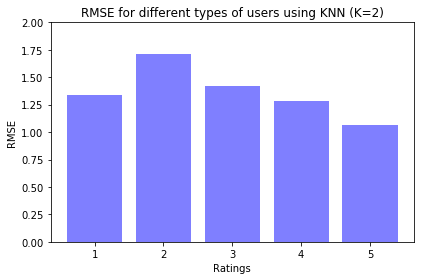

In [33]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_2, RMSE_rating2_k_2, RMSE_rating3_k_2, RMSE_rating4_k_2, RMSE_rating5_k_2]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=2)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.tight_layout()
plt.show()

### Calculate the RMSE for different types of users using KNN (K = 3)

In [34]:
# For rating 1
rating1 = data_ua_test[data_ua_test["user_id"].isin(user_list_step1)]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_3 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 3)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_3

# For rating 2
rating2 = data_ua_test[data_ua_test["user_id"].isin(user_list_step2)]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_3 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 3)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_3

# For rating 3
rating3 = data_ua_test[data_ua_test["user_id"].isin(user_list_step3)]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_3 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 3)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_3

# For rating 4
rating4 = data_ua_test[data_ua_test["user_id"].isin(user_list_step4)]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_3 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 3)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_3

# For rating 5
rating5 = data_ua_test[data_ua_test["user_id"].isin(user_list_step5)]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_3 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 3)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_3

-----------------------------Result for RMSE_rating1------------------------------------
1.37034091509
-----------------------------Result for RMSE_rating2------------------------------------
1.60228239479
-----------------------------Result for RMSE_rating3------------------------------------
1.33640736609
-----------------------------Result for RMSE_rating4------------------------------------
1.20522518751
-----------------------------Result for RMSE_rating5------------------------------------
1.00200087933


### Bar Chart - RMSE for different types of users using KNN (K=3)

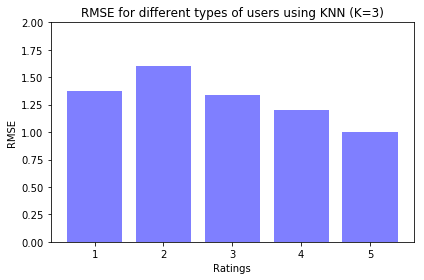

In [35]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_3, RMSE_rating2_k_3, RMSE_rating3_k_3, RMSE_rating4_k_3, RMSE_rating5_k_3]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=3)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.tight_layout()
plt.show()

### Calculate the RMSE for different types of users using KNN (K = 5)

In [36]:
# For rating 1
rating1 = data_ua_test[data_ua_test["user_id"].isin(user_list_step1)]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_5

# For rating 2
rating2 = data_ua_test[data_ua_test["user_id"].isin(user_list_step2)]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_5

# For rating 3
rating3 = data_ua_test[data_ua_test["user_id"].isin(user_list_step3)]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_5

# For rating 4
rating4 = data_ua_test[data_ua_test["user_id"].isin(user_list_step4)]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_5

# For rating 5
rating5 = data_ua_test[data_ua_test["user_id"].isin(user_list_step5)]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_5 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 5)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_5

-----------------------------Result for RMSE_rating1------------------------------------
1.37582575141
-----------------------------Result for RMSE_rating2------------------------------------
1.49730466277
-----------------------------Result for RMSE_rating3------------------------------------
1.26344024679
-----------------------------Result for RMSE_rating4------------------------------------
1.14335967285
-----------------------------Result for RMSE_rating5------------------------------------
0.953603054143


### Bar Chart - RMSE for different types of users using KNN (K=5)

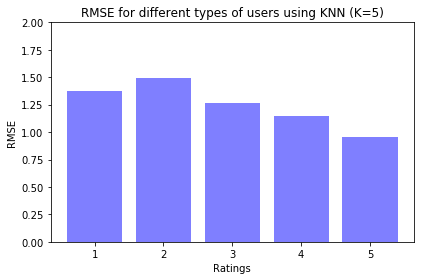

In [37]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_5, RMSE_rating2_k_5, RMSE_rating3_k_5, RMSE_rating4_k_5, RMSE_rating5_k_5]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=5)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.tight_layout()
plt.show()

### Calculate the RMSE for different types of users using KNN (K = 10)

In [38]:
# For rating 1
rating1 = data_ua_test[data_ua_test["user_id"].isin(user_list_step1)]
test_list_user, test_list_item, test_list_rating = get_list(rating1)
RMSE_rating1_k_10 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 10)

print "-----------------------------Result for RMSE_rating1------------------------------------"
print RMSE_rating1_k_10

# For rating 2
rating2 = data_ua_test[data_ua_test["user_id"].isin(user_list_step2)]
test_list_user, test_list_item, test_list_rating = get_list(rating2)
RMSE_rating2_k_10 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 10)

print "-----------------------------Result for RMSE_rating2------------------------------------"
print RMSE_rating2_k_10

# For rating 3
rating3 = data_ua_test[data_ua_test["user_id"].isin(user_list_step3)]
test_list_user, test_list_item, test_list_rating = get_list(rating3)
RMSE_rating3_k_10 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 10)

print "-----------------------------Result for RMSE_rating3------------------------------------"
print RMSE_rating3_k_10

# For rating 4
rating4 = data_ua_test[data_ua_test["user_id"].isin(user_list_step4)]
test_list_user, test_list_item, test_list_rating = get_list(rating4)
RMSE_rating4_k_10 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 10)

print "-----------------------------Result for RMSE_rating4------------------------------------"
print RMSE_rating4_k_10

# For rating 5
rating5 = data_ua_test[data_ua_test["user_id"].isin(user_list_step5)]
test_list_user, test_list_item, test_list_rating = get_list(rating5)
RMSE_rating5_k_10 = cal_RMSE_KNN(test_list_user, test_list_item, test_list_rating, 10)

print "-----------------------------Result for RMSE_rating5------------------------------------"
print RMSE_rating5_k_10

-----------------------------Result for RMSE_rating1------------------------------------
1.28351134123
-----------------------------Result for RMSE_rating2------------------------------------
1.40303187901
-----------------------------Result for RMSE_rating3------------------------------------
1.18670441157
-----------------------------Result for RMSE_rating4------------------------------------
1.08475148229
-----------------------------Result for RMSE_rating5------------------------------------
0.907052523314


### Bar Chart - RMSE for different types of users using KNN (K = 10)

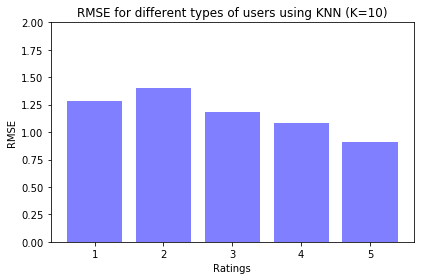

In [39]:
# Set the data
RMSE_test_ratings = [RMSE_rating1_k_10, RMSE_rating2_k_10, RMSE_rating3_k_10, RMSE_rating4_k_10, RMSE_rating5_k_10]
n_bar = 5
index = np.arange(n_bar)  
bar_width = 0.8
rects = plt.bar(index, RMSE_test_ratings, bar_width, alpha=0.5, color='b')  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=10)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.tight_layout()
plt.show()